# Homework w08d03 - Linear Discriminant Analysis

#### 1. Load the Boston housing dataset from sklearn. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn import metrics

boston = datasets.load_boston()
X = boston.data; y = boston.target

target_names = boston.feature_names

#### 2. Transform the continuous target variable into four different class labels according to which quartile of y the given the value belongs.

Hint: You can use the pandas describe function to determine the interquartile ranges.

In [13]:
y_ = pd.qcut(y,4,labels=False)

In [12]:
pd.Series(y_).value_counts()

1    129
0    127
2    126
3    124
dtype: int64

#### 3. Use dimensional reduction on the dataset. 
#### a) Transform to the first two principal components and determine the variance explained. Show a scatter plot in these two principal components with the points coloured according to their class. 

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
pca = PCA().fit(X)
comps = pca.transform(X)
comps.shape

(506L, 13L)

In [20]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.58113216180070282

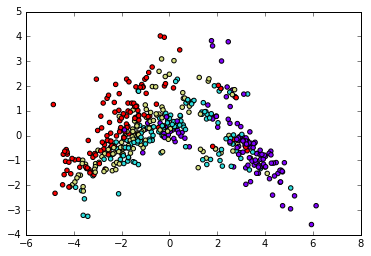

In [21]:
plt.scatter(comps[:,0],comps[:,1],cmap="rainbow",c=y_)
plt.show()

#### b) Transform to the first two LDA components and determine the variance explained. Show a scatter plot in these two  components with the points coloured according to their class. 

In [22]:
from sklearn.lda import LDA
lda_classifier = LDA()
lda_x_axis = lda_classifier.fit(X, y_).transform(X)
lda_classifier.explained_variance_ratio_[0]+lda_classifier.explained_variance_ratio_[1]

C:\Anaconda2\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


0.98424092032903576

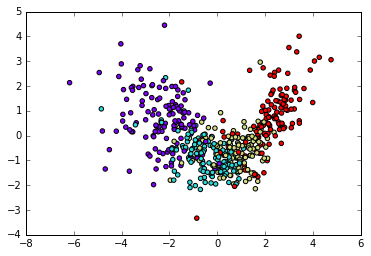

In [23]:
plt.scatter(lda_x_axis[:,0],lda_x_axis[:,1],cmap="rainbow",c=y_)
plt.show()

#### c) Describe the differences apparent from the scatter plots.

PCA: does a poorer job explaining variance with just two components (58% onl), and categories are not well separated at all

LDA: two components explain nearly all the variance (98%), and categories are better separated (although not perfectly)

#### 4.  Now split the LDA transformed and dimensionally reduced dataset into a training (70 %) and a test set  (30 %) and fit the data. Obtain the training and test accuracy scores, confusion matrix and classification report. 

In [26]:
X_train,X_test,y_train,y_test = train_test_split(lda_x_axis[:,:2],y_,test_size=.3,random_state=42)

In [34]:
lda_classifier = LDA().fit(X_train,y_train)
y_pred_train = lda_classifier.predict(X_train)
y_pred = lda_classifier.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,y_pred_train)
acc = accuracy_score(y_test, y_pred)
print("Training acccurary:%f\nTesting accurary: %f" % (acc_train, acc))

Training acccurary:0.725989
Testing accurary: 0.697368


In [39]:
from sklearn.metrics import classification_report
cls_rep_train = classification_report(y_train, y_pred_train)
cls_rep = classification_report(y_test, y_pred)
print(cls_rep_train)
print(cls_rep)

             precision    recall  f1-score   support

          0       0.88      0.84      0.86        86
          1       0.62      0.62      0.62        78
          2       0.58      0.66      0.62        95
          3       0.85      0.78      0.81        95

avg / total       0.74      0.73      0.73       354

             precision    recall  f1-score   support

          0       0.80      0.85      0.82        41
          1       0.73      0.47      0.57        51
          2       0.51      0.81      0.62        31
          3       0.85      0.76      0.80        29

avg / total       0.72      0.70      0.69       152



In [42]:
from sklearn.metrics import confusion_matrix
conmat = np.array(confusion_matrix(y_train, y_pred_train))
confusion = pd.DataFrame(conmat, index=['is 1', 'is 2','is 3','is 4'],columns=['predicted 1', 'predicted 2','predicted 3','predicted 4'])
confusion

,predicted 1,predicted 2,predicted 3,predicted 4
is 1,72,11,3,0
is 2,7,48,23,0
is 3,3,16,63,13
is 4,0,2,19,74


In [41]:
from sklearn.metrics import confusion_matrix
conmat = np.array(confusion_matrix(y_test, y_pred))
confusion = pd.DataFrame(conmat, index=['is 1', 'is 2','is 3','is 4'],columns=['predicted 1', 'predicted 2','predicted 3','predicted 4'])
confusion

,predicted 1,predicted 2,predicted 3,predicted 4
is 1,35,6,0,0
is 2,8,24,19,0
is 3,0,2,25,4
is 4,1,1,5,22
